## MH Algorithm

# Introduction
Metropolis-Hastings (MH) algorithm, is a cornerstone of Markov Chain Monte Carlo (MCMC) methods. It is especially useful when we want to sample from a very complex or high dimensional “target” distribution, since direct sampling would be hard and not feasible.

The MH algorithm works by simulating a Markov Chain, whose stationary distribution is the desired target distribution. This means that, in the long run, the samples from the Markov chain look like the samples from π
. Its main limitation is that, for difficult problems, “in the long run” may mean after a very long time.




# Algorithm Implementation

## Pseudocode
1. Initialize an arbitrary point $(x_0)$ as the first sample.
2. For each iteration ($t$):

   a. Generate a candidate ($x'$) from a proposal distribution ($q(x'|x_{t-1})$).

   b. Compute acceptance probability ($ \alpha = \min\left(1, \frac{p(x')q(x_{t-1}|x')}{p(x_{t-1})q(x'|x_{t-1})}\right) $).

   c. Accept ($x'$) with probability ($\alpha$), else stay at ($x_{t-1}$).

3. Repeat step 2 for the desired number of iterations.

## Implementation Details
The choice of the proposal distribution ($q$) is crucial for the efficiency of the algorithm. Common choices include Gaussian or uniform distributions. By leverging the symmetry property of sampling transition distribution (matrix), we can have more effecient sampling. The tuning of parameters, like the variance in the Gaussian proposal, affects the acceptance rate and convergence of the chain.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal, poisson

# Metropolis-Hastings for Continuous Univariate Case
def metropolis_hastings(target_pdf, proposal_dist, proposal_params, initial_value, n_samples):
    samples = [initial_value]
    current = initial_value

    for _ in range(n_samples):
        candidate = proposal_dist(current, **proposal_params)
        acceptance_prob = min(1, target_pdf(candidate) / target_pdf(current))

        if np.random.rand() < acceptance_prob:
            current = candidate

        samples.append(current)

    return np.array(samples)

# Metropolis-Hastings for Continuous Multivariate Case
def metropolis_hastings_multivariate(target_pdf, proposal_dist, proposal_params, initial_value, n_samples):
    samples = [initial_value]
    current = initial_value

    for _ in range(n_samples):
        candidate = proposal_dist(current, **proposal_params)
        acceptance_prob = min(1, target_pdf(candidate) / target_pdf(current))

        if np.random.rand() < acceptance_prob:
            current = candidate

        samples.append(current)

    return np.array(samples)

# Metropolis-Hastings for Discrete Univariate Case
def metropolis_hastings_discrete_univariate(target_pmf, proposal, initial_value, n_samples):
    samples = [initial_value]
    current = initial_value

    for _ in range(n_samples):
        candidate = proposal(current)
        acceptance_prob = min(1, target_pmf(candidate) / target_pmf(current))

        if np.random.rand() < acceptance_prob:
            current = candidate

        samples.append(current)

    return samples

# Metropolis-Hastings for Discrete Multivariate Case
def metropolis_hastings_discrete_multivariate(target_pmf, proposal, initial_value, n_samples, n_variables):
    samples = [initial_value]
    current = initial_value

    for _ in range(n_samples):
        candidate = proposal(current)
        acceptance_prob = min(1, target_pmf(candidate) / target_pmf(current))

        if np.random.rand() < acceptance_prob:
            current = candidate

        samples.append(current)

    return np.array(samples)

def autocorrelation(samples, lag=1):
    n = len(samples)
    mean = np.mean(samples, axis=0)
    var = np.var(samples, axis=0)
    autocov = np.sum((samples[:-lag] - mean) * (samples[lag:] - mean), axis=0) / n
    autocorr = autocov / var
    return autocorr

### Univariate case (Continuous)

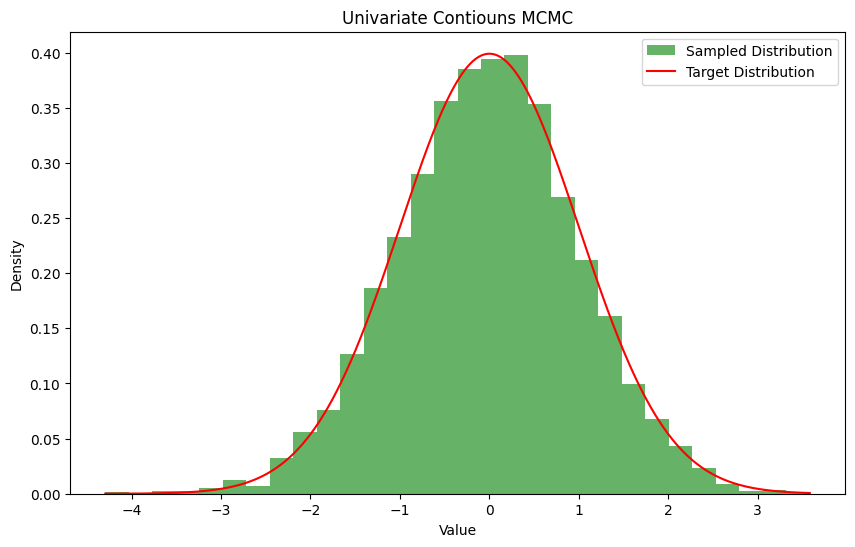

In [ ]:
# Univariate Gaussian Distribution
target_pdf = lambda x: (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)
proposal_dist = lambda x, std_dev: np.random.normal(x, std_dev)  # Gaussian proposal
proposal_params = {'std_dev': 1.0}
initial_value = 0
n_samples = 10000

samples_1d = metropolis_hastings(target_pdf, proposal_dist, proposal_params, initial_value, n_samples)

# Plotting
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(samples_1d, bins=30, density=True, alpha=0.6, color='g', label='Sampled Distribution')
x = np.linspace(min(samples_1d), max(samples_1d), 1000)
plt.plot(x, target_pdf(x), color='r', label='Target Distribution')
plt.title('Univariate Contiouns MCMC')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

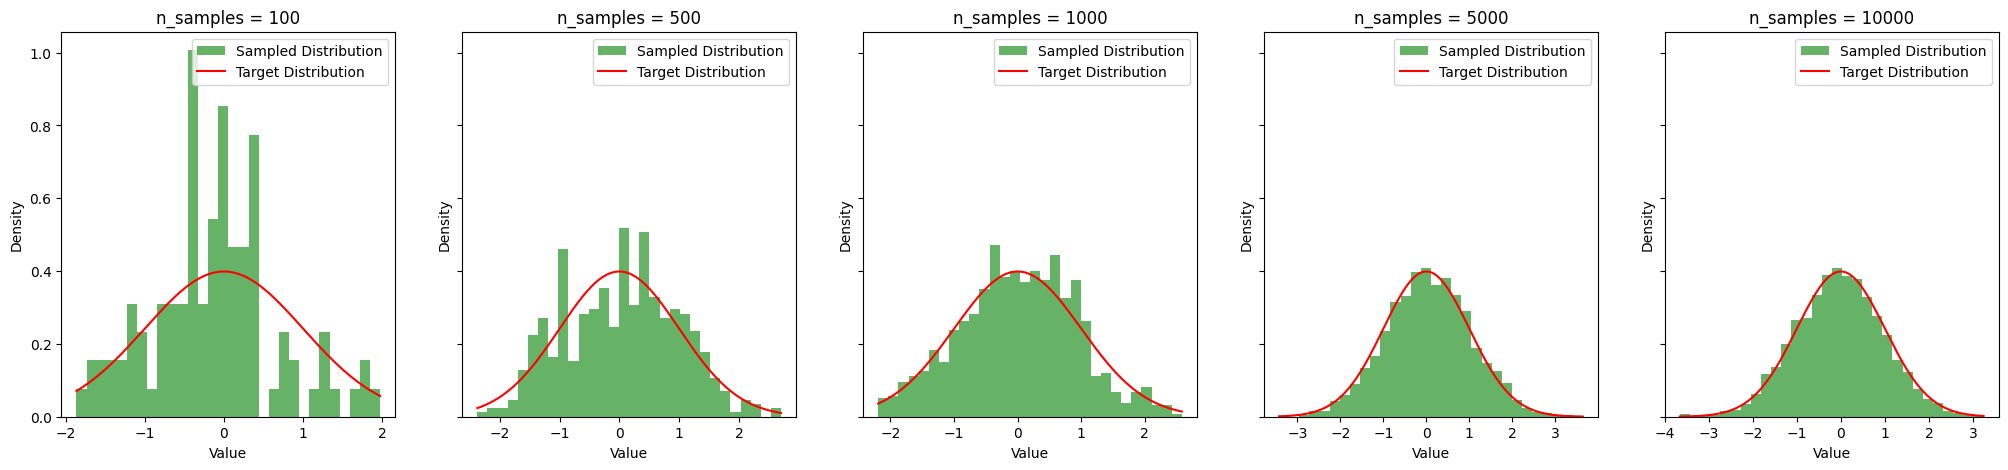

In [ ]:
# Comparison of different times of sampling
n_samples_list = [100, 500, 1000, 5000, 10000]
fig, axes = plt.subplots(1, len(n_samples_list), sharey=True, figsize=(5*len(n_samples_list), 5))


for n_samples, ax in zip(n_samples_list, axes):
  samples = metropolis_hastings(target_pdf, proposal_dist, proposal_params, initial_value, n_samples)

  count, bins, ignored = ax.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Sampled Distribution')
  x = np.linspace(min(samples), max(samples), 1000)
  ax.plot(x, target_pdf(x), color='r', label='Target Distribution')
  ax.set_title(f'n_samples = {n_samples}')
  ax.set_xlabel('Value')
  ax.set_ylabel('Density')
  ax.legend()

### Univariate (Discrete)

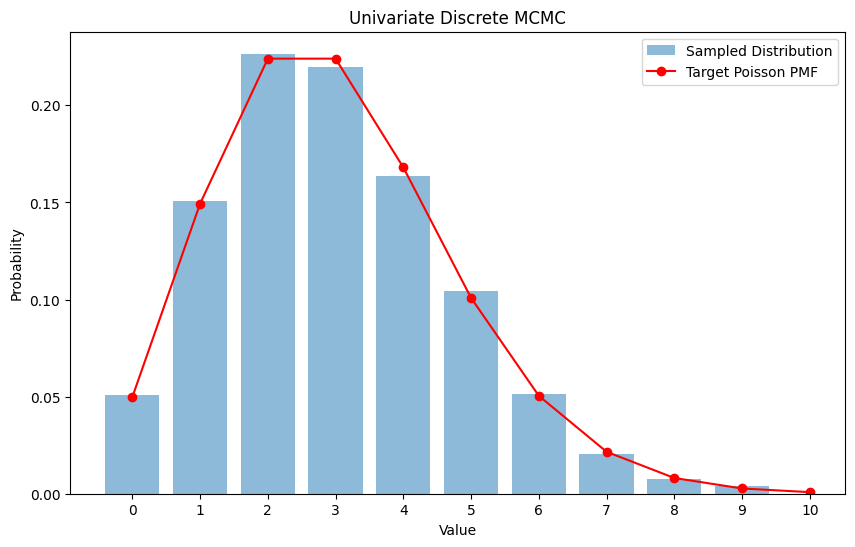

In [ ]:
# Target distribution: Poisson PMF
lambda_param = 3
target_pmf = lambda x: poisson.pmf(x, lambda_param)

# Proposal distribution: simple random walk
proposal = lambda x: x + np.random.choice([-1, 1])

initial_value = 0
n_samples = 10000

samples = metropolis_hastings_discrete_univariate(target_pmf, proposal, initial_value, n_samples)

plt.figure(figsize=(10, 6))
values = range(min(samples), max(samples) + 1)
plt.hist(samples, bins=values, density=True, align='left', rwidth=0.8, alpha=0.5, label='Sampled Distribution')

poisson_pmf_values = [poisson.pmf(v, lambda_param) for v in values]
plt.plot(values, poisson_pmf_values, marker='o', color='red', label='Target Poisson PMF')

plt.title('Univariate Discrete MCMC')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.xticks(values)
plt.legend()

Text(0, 0.5, 'Value in Dimension 1')

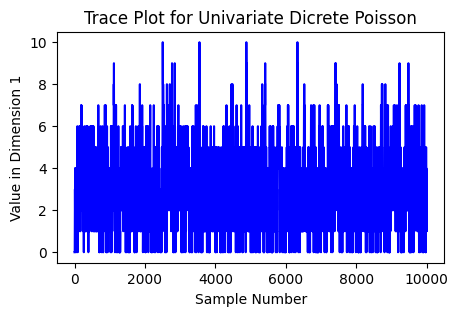

In [ ]:
# Convergence check
plt.figure(figsize=(5, 3))
# Trace Plot
## Check if there is obvious tendency, existence -> not convergence
plt.plot(samples, color='blue')
plt.title('Trace Plot for Univariate Dicrete Poisson')
plt.xlabel('Sample Number')
plt.ylabel('Value in Dimension 1')

### Multivariate case (Continuous)


<ipython-input-10-21da6e488543>:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, rv.pdf(pos), colors='r', label='Target Distribution')


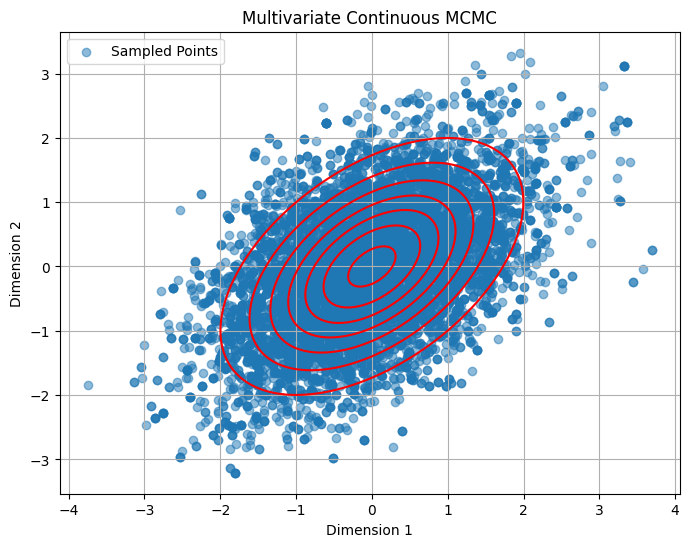

In [ ]:
# Multivariate Continous Gaussian
mean = [0, 0]
covariance = [[1, 0.5], [0.5, 1]]
target_pdf = lambda x: multivariate_normal(mean, covariance).pdf(x)
proposal_dist = lambda x, cov: np.random.multivariate_normal(x, cov)
proposal_params = {'cov': np.diag([1, 1])}
initial_value = np.array([0, 0])
n_samples = 10000

samples = metropolis_hastings_multivariate(target_pdf, proposal_dist, proposal_params, initial_value, n_samples)

# Scatter plot of sampled points
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Sampled Points')

# Plot the true distribution
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mean, covariance)
plt.contour(x, y, rv.pdf(pos), colors='r', label='Target Distribution')

plt.title('Multivariate Continuous MCMC')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)


### Multivariate (Discrete)

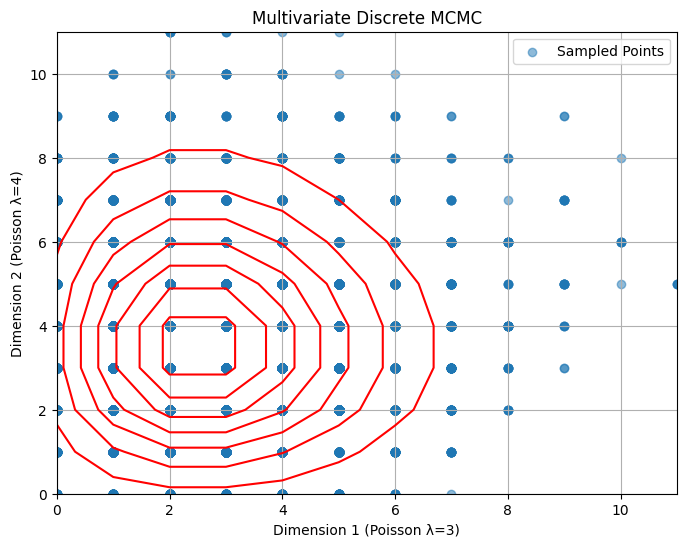

In [ ]:
# Multivariate Discrete Poisson
lambda_params = [3, 4]
target_pmf = lambda x: np.prod([poisson.pmf(x[i], lambda_params[i]) for i in range(len(x))])

# Proposal distribution: random walk
def proposal(x):
    step = np.random.choice([-1, 1], size=len(x))
    return np.clip(x + step, 0, None)  # Ensure non-negative values

initial_value = np.array([0, 0])
n_samples = 10000
n_variables = 2

samples = metropolis_hastings_discrete_multivariate(target_pmf, proposal, initial_value, n_samples, n_variables)

# Scatter plot of sampled points
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Sampled Points')

x_range = range(0, max(samples[:, 0]) + 1)
y_range = range(0, max(samples[:, 1]) + 1)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([[target_pmf([x, y]) for x in x_range] for y in y_range])

plt.contour(X, Y, Z, colors='red')
plt.title('Multivariate Discrete MCMC')
plt.xlabel('Dimension 1 (Poisson λ=3)')
plt.ylabel('Dimension 2 (Poisson λ=4)')
plt.legend()
plt.grid(True)


## More complicated distribution

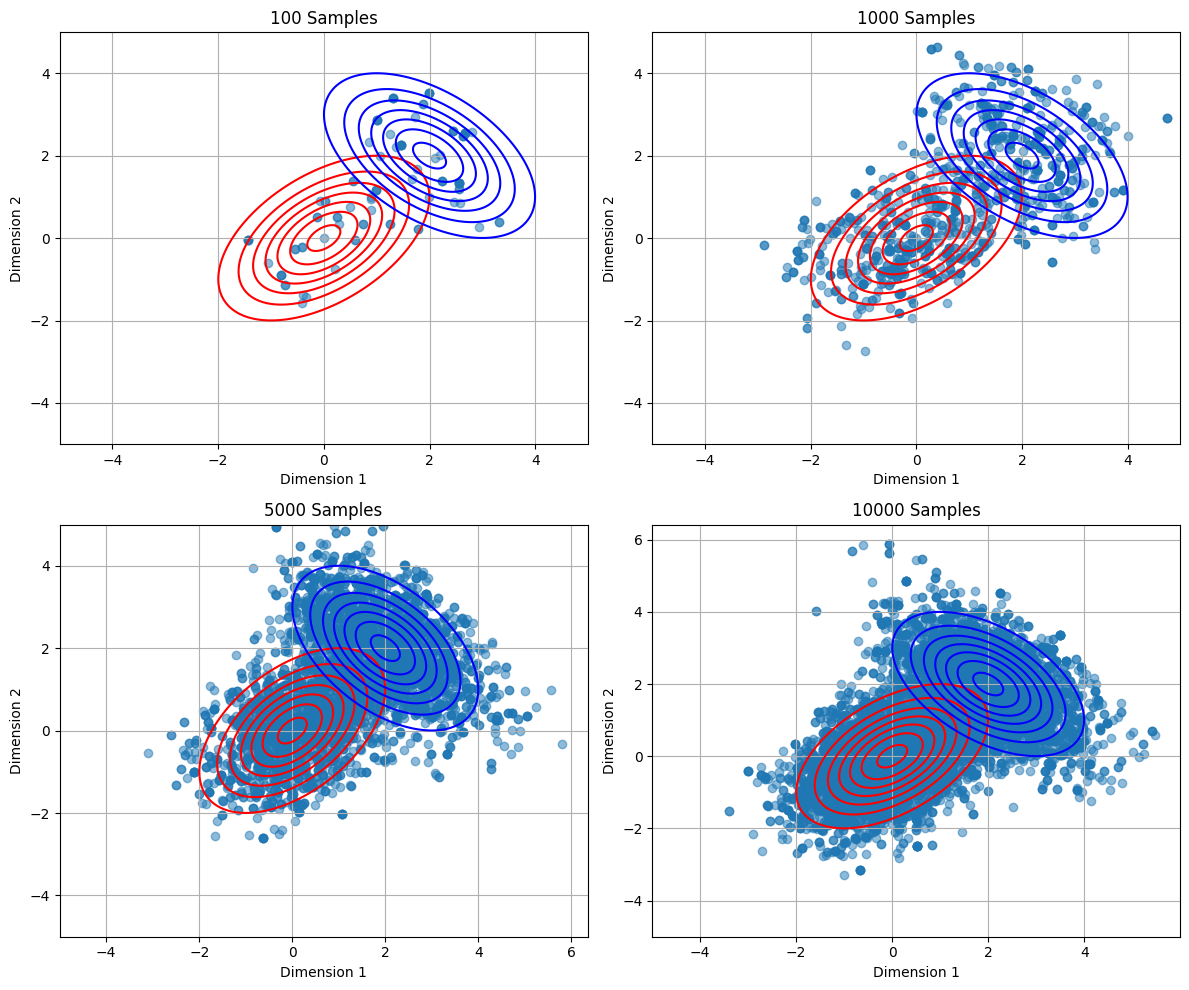

In [ ]:
# Define the target distribution (a mixture of Gaussians) and the proposal distribution
mean1, cov1 = [0, 0], [[1, 0.5], [0.5, 1]]
mean2, cov2 = [2, 2], [[1, -0.5], [-0.5, 1]]
target_pdf = lambda x: 0.5 * multivariate_normal(mean1, cov1).pdf(x) + 0.5 * multivariate_normal(mean2, cov2).pdf(x)
proposal_dist = lambda x, cov: np.random.multivariate_normal(x, cov)
proposal_params = {'cov': np.diag([1, 1])}
initial_value = np.array([0, 0])

x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))
rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)

# Different numbers of samples for subplots
sample_numbers = [100, 1000, 5000, 10000]

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, n_samples in enumerate(sample_numbers):
    samples_2d = metropolis_hastings_multivariate(target_pdf, proposal_dist, proposal_params, initial_value, n_samples)

    # Plotting the samples
    axes[i].scatter(samples_2d[:, 0], samples_2d[:, 1], alpha=0.5)

    # Adding contours for the target distributions
    axes[i].contour(x, y, rv1.pdf(pos), colors='r')
    axes[i].contour(x, y, rv2.pdf(pos), colors='b')

    # Titles and labels
    axes[i].set_title(f'{n_samples} Samples')
    axes[i].set_xlabel('Dimension 1')
    axes[i].set_ylabel('Dimension 2')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


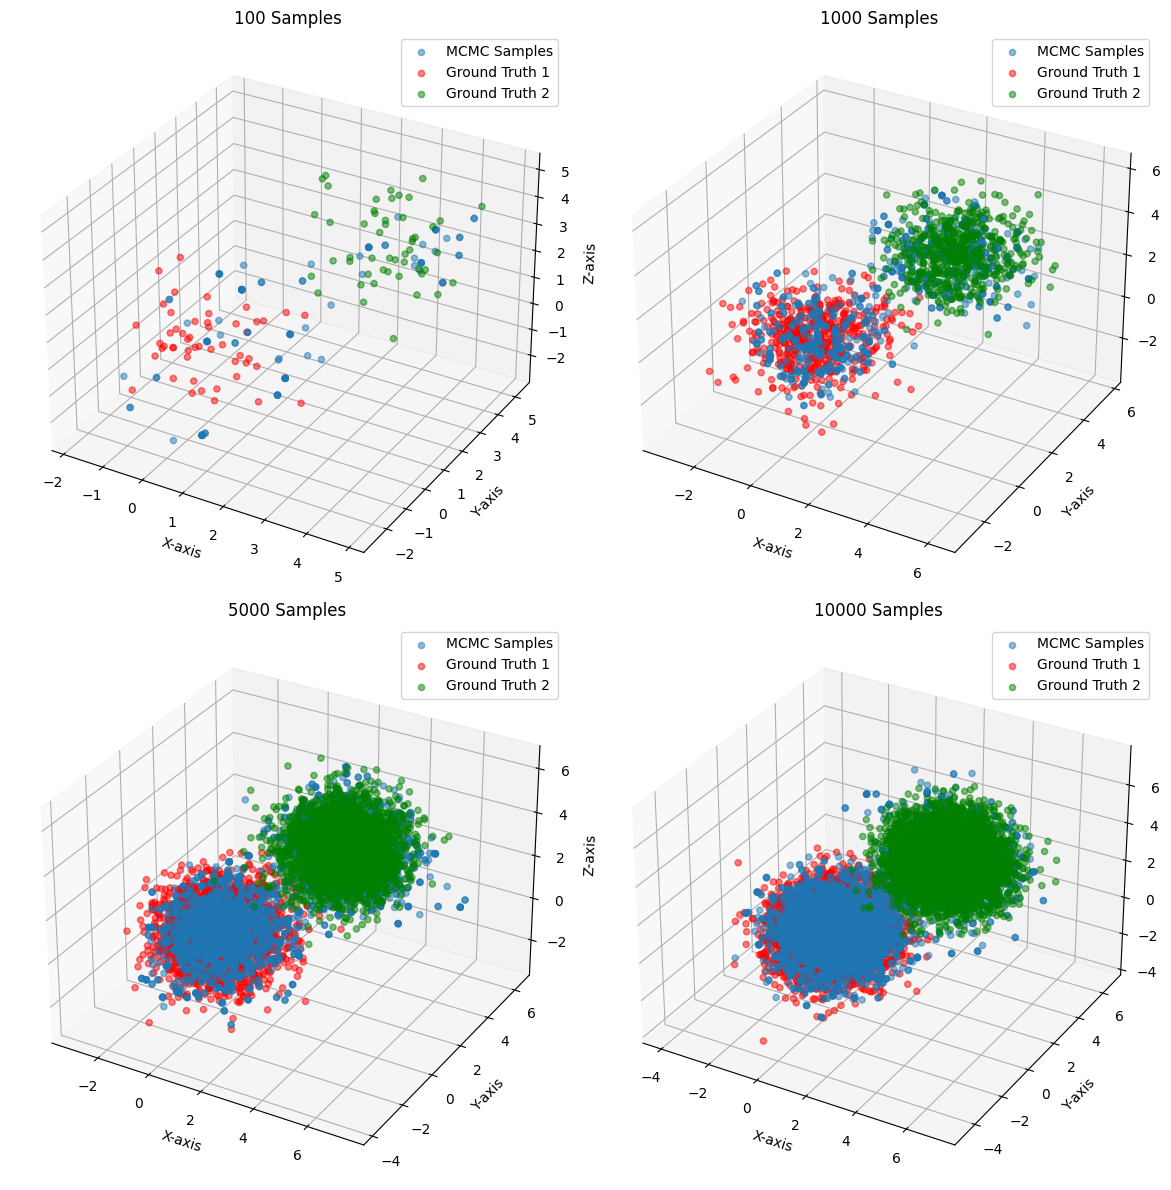

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Defining a new 3D target distribution (a mixture of Gaussians)
mean3d_1, cov3d_1 = [0, 0, 0], np.diag([1, 1, 1])
mean3d_2, cov3d_2 = [3, 3, 3], np.diag([1, 1, 1])
target_pdf_3d = lambda x: 0.5 * multivariate_normal(mean3d_1, cov3d_1).pdf(x) + 0.5 * multivariate_normal(mean3d_2, cov3d_2).pdf(x)
proposal_dist_3d = lambda x, cov: np.random.multivariate_normal(x, cov)
proposal_params_3d = {'cov': np.diag([1, 1, 1])}
initial_value_3d = np.array([0, 0, 0])

def generate_ground_truth_samples_3d(mean, cov, n_samples=1000):
    return np.random.multivariate_normal(mean, cov, n_samples)

# Different numbers of samples for subplots in 3D
sample_numbers_3d = [100, 1000, 5000, 10000]

fig = plt.figure(figsize=(12, 12))

for i, n_samples in enumerate(sample_numbers_3d):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    samples_3d = metropolis_hastings_multivariate(target_pdf_3d, proposal_dist_3d, proposal_params_3d, initial_value_3d, n_samples)

    # Ground truth samples for the two components
    gt_samples_3d_1 = generate_ground_truth_samples_3d(mean3d_1, cov3d_1, n_samples // 2)
    gt_samples_3d_2 = generate_ground_truth_samples_3d(mean3d_2, cov3d_2, n_samples // 2)

    # Plotting the MCMC samples
    ax.scatter(samples_3d[:, 0], samples_3d[:, 1], samples_3d[:, 2], alpha=0.5, label='MCMC Samples')

    # Plotting the ground truth samples
    ax.scatter(gt_samples_3d_1[:, 0], gt_samples_3d_1[:, 1], gt_samples_3d_1[:, 2], alpha=0.5, color='r', label='Ground Truth 1')
    ax.scatter(gt_samples_3d_2[:, 0], gt_samples_3d_2[:, 1], gt_samples_3d_2[:, 2], alpha=0.5, color='g', label='Ground Truth 2')

    # Titles and labels
    ax.set_title(f'{n_samples} Samples')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

plt.tight_layout()
plt.show()


### Convergence time comparison

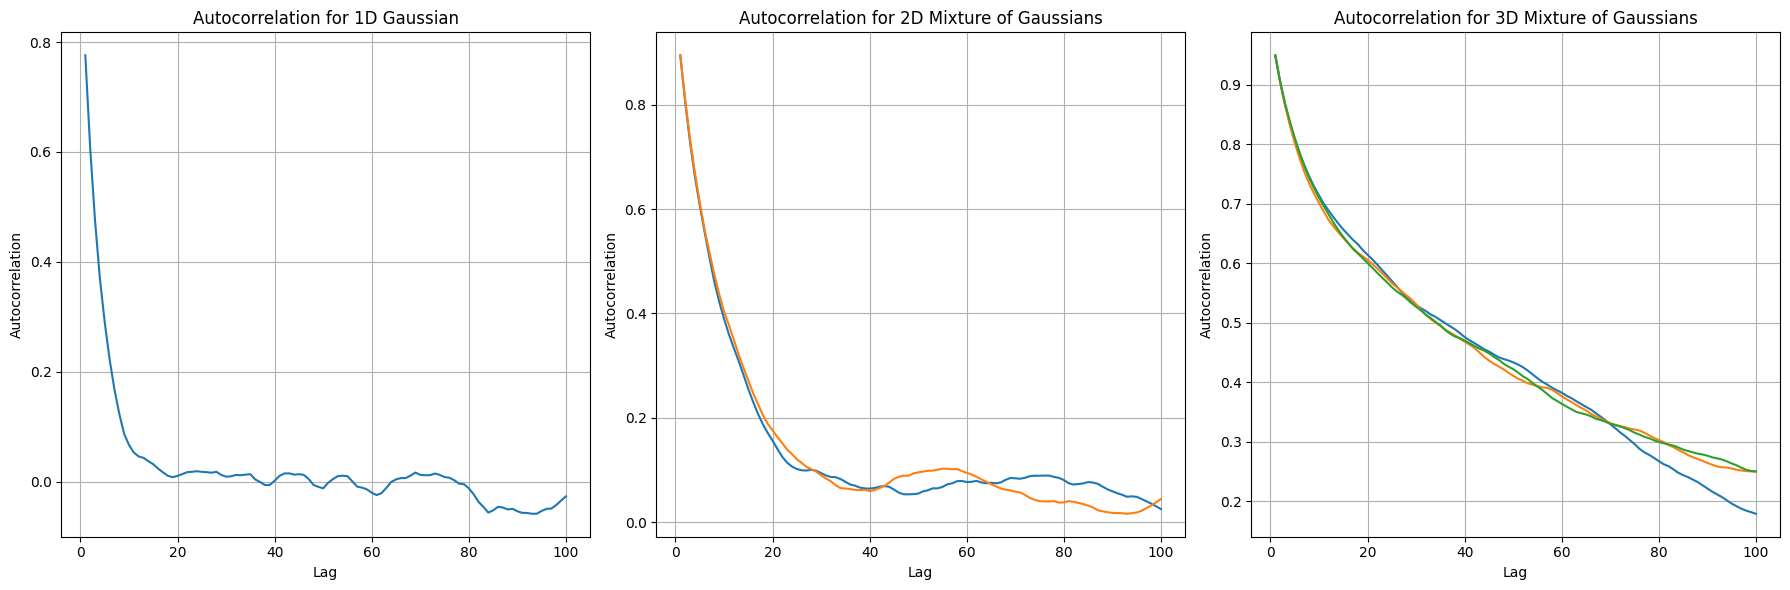

In [ ]:
# Compute autocorrelation for different lags for 2D and 3D distributions
lags = range(1, 101)  # Considering lags up to 100
autocorrs_1d = [autocorrelation(samples_1d, lag) for lag in lags]
autocorrs_2d = [autocorrelation(samples_2d, lag) for lag in lags]
autocorrs_3d = [autocorrelation(samples_3d, lag) for lag in lags]

# Convert to DataFrame for plotting
df_autocorr_2d = pd.DataFrame(autocorrs_2d, index=lags)
df_autocorr_3d = pd.DataFrame(autocorrs_3d, index=lags)

# Convert to DataFrame for plotting
df_autocorr_1d = pd.DataFrame(autocorrs_1d, index=lags)

# Plotting all three distributions' autocorrelations
plt.figure(figsize=(18, 6))

# 1D plot
plt.subplot(1, 3, 1)
plt.plot(df_autocorr_1d)
plt.title('Autocorrelation for 1D Gaussian')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

# 2D plot
plt.subplot(1, 3, 2)
plt.plot(df_autocorr_2d)
plt.title('Autocorrelation for 2D Mixture of Gaussians')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

# 3D plot
plt.subplot(1, 3, 3)
plt.plot(df_autocorr_3d)
plt.title('Autocorrelation for 3D Mixture of Gaussians')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.tight_layout()
plt.show()
